             mass          Q        time
count   11.000000  11.000000   11.000000
mean   311.051818   0.822364  161.522727
std      1.739901   0.004523    0.903428
min    309.275000   0.818000  160.600000
25%    309.756000   0.819000  160.850000
50%    310.912000   0.822000  161.450000
75%    311.586000   0.823500  161.800000
max    314.667000   0.832000  163.400000

mass    3.027254
Q       0.000020
time    0.816182
dtype: float64
margin = 1.1688811018759846, t_n = 2.2281388519649385
|    |   $m_\text{HCl}$, мкг |   $Q = It$, Кл |   Время, с |
|----|-----------------------|----------------|------------|
|  0 |               310.912 |          0.822 |     161.45 |
|  1 |               314.667 |          0.832 |     163.4  |
|  2 |               313.608 |          0.829 |     162.85 |
|  3 |               309.275 |          0.818 |     160.6  |
|  4 |               311.297 |          0.823 |     161.65 |
|  5 |               309.66  |          0.819 |     160.8  |
|  6 |               3

<AxesSubplot: >

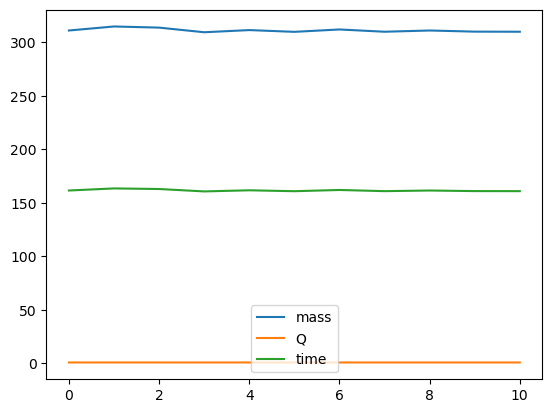

In [113]:
import pandas as pd

# Создание DataFrame
data = {'mass': [310.912, 314.667, 313.608, 309.275, 311.297, 309.660, 311.875,
                 309.756, 310.912, 309.852, 309.756], #мкг 
        'Q': [0.822, 0.832, 0.829, 0.818, 0.823, 0.819, 0.824,
              0.819, 0.822, 0.819, 0.819],      #Кл
        'time': [161.45, 163.40, 162.85, 160.60, 161.65, 160.80, 161.95,
                160.85, 161.45, 160.90, 160.85],  #сек
       }


df = pd.DataFrame(data)

print(df.describe(include = "all"))
print()
print(df.var())

V0 = 10 #мл


import scipy.stats as st

def conf_interval(series, confidence=0.95):
    mean = series.mean()
    sem = st.sem(series)
    margin = sem * st.t.ppf((1 + confidence) / 2, len(series) - 1)
    print(f"margin = {margin}, t_n = {st.t.ppf((1 + confidence) / 2, len(series) - 1)}")
    return margin


conf_interval(df['mass'])


#print(df.to_markdown())



from tabulate import tabulate
print(tabulate(df, headers=["$m_\\text{HCl}$, мкг",
                            "$Q = It$, Кл",
                            "Время, с"], tablefmt='github', showindex=True))
df.plot()

In [168]:
import numpy as np


def remove_elements(list, elem):

    N = len(list); k = 0
    
    for i in range(N):
        
        if list[i-k] == elem:

            list.pop(i-k)
            k += 1

    return list

def return_func(string, elem, func):

    string = "".join(string).split(elem)#.strip().split(elem)

    if string[0] == '':
        
        string = remove_elements(string, "")
        if len(string) == 1:
            N = 1
        else:
            N = int(len(string)/2) 
        for i in range(N):
            j = 2*i
            string[j] = func(string[j])
        
    else:

        string = remove_elements(string, "")
        N = int(len(string)/2)
        for i in range(N):
            j = 2*i + 1 
            string[j] = func(string[j])

    string = "".join(string)
    
    return string 

c = ["asdawdawd", "wdawdawda $ a aawdawdawd$", "$awdawdawd$  awdawdawdawd"]
b = ["wdawd",'awdawdawd','$awdawd$ awdaw d $awdawdawd$']
s = ["wdawd",'awdawdawd','$awdawd$ awdaw d $awdawdawd$']
e = ["wdawd",'awdawdawd','$awdawd$ awdaw d $awdawdawd$']
a = [b,c,s,e]

def len_cell(strings):
    
    i = 0
    string_max_lens = []
    strings_max_lens = []
    
    for string in strings:
        i+=1
        string_max_lens = []
        for cell in string:
            
            cell = str(cell)
            

            #print(cell)
            cell2 = cell.split("$")
            len_math = [len("".join(x.split(" "))) for x in cell2]
            if len(len_math) == 1:
                max_math = len_math[0]
            else:
                max_math = np.max(len_math)

            #print(f"{i} math: {cell2} {len_math} {max_math}")


            cell1 = return_func(cell, "$", lambda x: "")
            cell1 = cell1.split(" ")
            len_word = [len(x) for x in cell1]
            if len(len_word) == 1:
                max_word = len(len_word)
            else:
                max_word = np.max(len_word)

            #print(f"{i} word: {cell1} {len_word} {max_word}")

            MAX = np.max([max_word, max_math])
            string_max_lens.append(MAX)
            
        strings_max_lens.append(string_max_lens)
        
    print(strings_max_lens)
    
    final_max = []
    a = 0
    
    for i in range(len(strings_max_lens[0])):
        for j in range(len(strings_max_lens)):

            if a < strings_max_lens[j][i]:
                a = strings_max_lens[j][i]
            
        final_max.append(a)
        
            
   
    return final_max
        
len_cell(a)

[[5, 9, 9], [9, 11, 12], [5, 9, 9], [5, 9, 9]]


[9, 11, 12]